# Get simple clean time_series plot for single data per time_month

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
CARIACO = pd.read_csv("../DATA/Combined_CARIACO_data.csv")

In [8]:
CARIACO['date'] = pd.to_datetime(CARIACO['time_month'])

In [14]:
CARIACO.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256 entries, 0 to 255
Data columns (total 97 columns):
 #   Column                                                  Non-Null Count  Dtype         
---  ------                                                  --------------  -----         
 0   Unnamed: 0                                              256 non-null    int64         
 1   X10m_u_component_of_wind                                256 non-null    float64       
 2   X10m_v_component_of_neutral_wind                        256 non-null    float64       
 3   X10m_v_component_of_wind                                256 non-null    float64       
 4   X10m_wind_speed                                         256 non-null    float64       
 5   X2m_temperature                                         256 non-null    float64       
 6   coefficient_of_drag_with_waves                          256 non-null    float64       
 7   instantaneous_eastward_turbulent_surface_stress         256 no

# Plot SST of ERA5 vs CTD

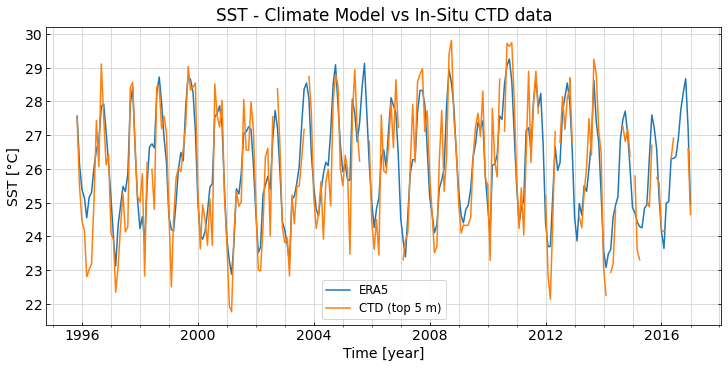

In [82]:
import matplotlib.dates as mdates

plt.rcParams['figure.figsize'] = [10, 5]
plt.rcParams.update({'font.size': 14})

f1, ax = plt.subplots(1, 1, sharex='col', constrained_layout=True) 

ax.xaxis.set_minor_locator(mdates.YearLocator())

ax.grid(True,which='both', color='lightgrey')
ax.tick_params(top=False, right=True, direction="in")

ax.plot(CARIACO['date'], CARIACO['sea_surface_temperature']-273.15, label="ERA5")

ax.plot(CARIACO['date'], CARIACO['temp_5'], label="CTD (top 5 m)")

ax.set_ylabel("SST [°C]")
ax.set_xlabel("Time [year]")

plt.legend(fontsize="small")
plt.title("SST - Climate Model vs In-Situ CTD data")


plt.savefig('Plots/01_ClimateModelvsCTD.pdf', bbox_inches='tight')
plt.show()

# Plot Nutrient Time Series
- normal time series +
- deviation from the mean

In [ ]:
import matplotlib.dates as mdates

plt.rcParams['figure.figsize'] = [9, 5]

f1, ax = plt.subplots(1, 1, sharex='col', constrained_layout=True) 

ax.xaxis.set_minor_locator(mdates.YearLocator())

ax.grid(True,which='both', color='lightgrey')
ax.tick_params(top=False, right=True, direction="in")

ax.plot(CARIACO['date'], CARIACO['sea_surface_temperature']-273.15, label="ERA5")

ax.plot(CARIACO['date'], CARIACO['temp_5'], label="CTD (top 5 m)")

ax.set_ylabel("SST [°C]")
ax.set_xlabel("Time [year]")

plt.legend()
plt.title("SST - Climate Model vs In-Situ CTD data")


#plt.savefig('Plots/01_ClimateModelvsCTD.pdf', bbox_inches='tight')
plt.show()

# PLOT Chlorophyll + Primary Production

In [83]:
var_data = pd.DataFrame(CARIACO, columns=['date', 'Chlorophyll'])

In [104]:
var_data = pd.DataFrame(CARIACO, columns=['date', 'Chlorophyll'])
var_data = var_data.set_index('date')

In [127]:
idx = np.isfinite(var_data.Chlorophyll.values)
idx

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True, False,  True,  True,  True,  True,  True,
        True,  True,

In [129]:
np.polyfit(mdates.date2num(var_data.index[idx]), var_data.iloc[:,-1:].values[idx].flatten(), 1)

array([-2.71635369e-05,  7.41281489e-01])

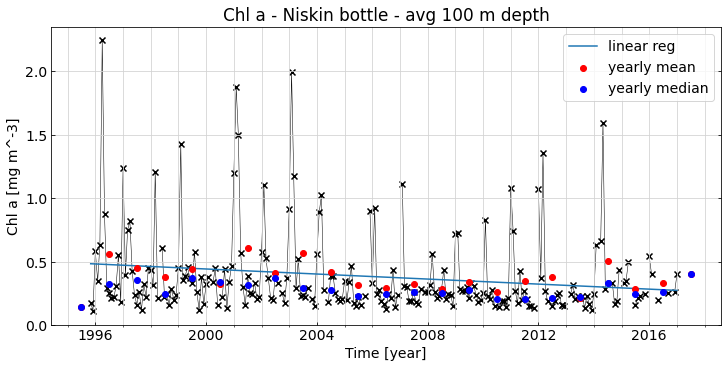

In [207]:
import matplotlib.dates as mdates

from datetime import timedelta
delta = timedelta(days=365/2)

plt.rcParams['figure.figsize'] = [10, 5]
plt.rcParams.update({'font.size': 14})

f1, ax = plt.subplots(1, 1, sharex='col', constrained_layout=True) 

ax.xaxis.set_minor_locator(mdates.YearLocator())


#plot time series
ax.plot(var_data.index, var_data.iloc[:,-1:], c='black', lw=0.5, zorder=0)

ax.scatter(var_data.index, var_data.iloc[:,-1:], c='black', marker='x', zorder=0)


ax.grid(True,which='both', color='lightgrey')
ax.tick_params(top=False, right=True, direction="in")

# plot yearly mean
yearly_mean = var_data.groupby(var_data.index.year).mean()
ax.scatter(var_data.resample('Y').first().index-delta, yearly_mean.iloc[:,-1:], c='red', label='yearly mean', zorder=10)
# plot yearly median
yearly_mean = var_data.groupby(var_data.index.year).median()
ax.scatter(var_data.resample('Y').first().index-delta, yearly_mean.iloc[:,-1:], c='blue', label='yearly median', zorder=10)

# plot linear reg
idx = np.isfinite(var_data.Chlorophyll.values)
fit = np.polyfit(mdates.date2num(var_data.index[idx]), var_data.iloc[:,-1:].values[idx].flatten(), 1)
fit_fn = np.poly1d(fit)

ax.plot(var_data.index, fit_fn(mdates.date2num(var_data.index)), label='linear reg', zorder=5)


ax.set_ylim(bottom=0)

ax.set_ylabel("Chl a [mg m^-3]")
ax.set_xlabel("Time [year]")

plt.legend()
ax.set_title("Chl a - Niskin bottle - avg 100 m depth")


#plt.savefig('Plots/01_ClimateModelvsCTD.pdf', bbox_inches='tight')
plt.show()

In [185]:
dat_mean

nan

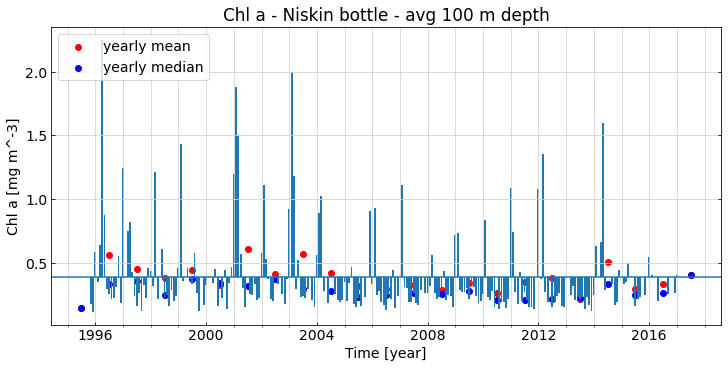

In [203]:
import matplotlib.dates as mdates

from datetime import timedelta
delta = timedelta(days=365/2)

plt.rcParams['figure.figsize'] = [10, 5]
plt.rcParams.update({'font.size': 14})

f1, ax = plt.subplots(1, 1, sharex='col', constrained_layout=True) 


# plot yearly mean
yearly_mean = var_data.groupby(var_data.index.year).mean()
ax.scatter(var_data.resample('Y').first().index-delta, yearly_mean.iloc[:,-1:], c='red', label='yearly mean')
# plot yearly median
yearly_mean = var_data.groupby(var_data.index.year).median()
ax.scatter(var_data.resample('Y').first().index-delta, yearly_mean.iloc[:,-1:], c='blue', label='yearly median')


ax.xaxis.set_minor_locator(mdates.YearLocator())

dat_mean = np.nanmean(var_data.Chlorophyll.values)

#plot time series
ax.bar(x=var_data.index, height=var_data.Chlorophyll.values-dat_mean, align='center',width=25,bottom=dat_mean)

#ax.spines['bottom'].set_position(('data', dat_mean))

#ax.scatter(var_data.index, var_data.iloc[:,-1:]- dat_mean, c='black', marker='x')
ax.axhline(y=dat_mean)

ax.grid(True,which='both', color='lightgrey')
ax.tick_params(top=False, right=True, direction="in")

# plot linear reg
#idx = np.isfinite(var_data.Chlorophyll.values)
#fit = np.polyfit(mdates.date2num(var_data.index[idx]), var_data.iloc[:,-1:].values[idx].flatten(), 1)
#fit_fn = np.poly1d(fit)
#ax.plot(var_data.index, fit_fn(mdates.date2num(var_data.index)), label='linear reg')


#ax.set_ylim(bottom=0)

ax.set_ylabel("Chl a [mg m^-3]")
ax.set_xlabel("Time [year]")

plt.legend()
ax.set_title("Chl a - Niskin bottle - avg 100 m depth")


#plt.savefig('Plots/01_ClimateModelvsCTD.pdf', bbox_inches='tight')
plt.show()

No handles with labels found to put in legend.


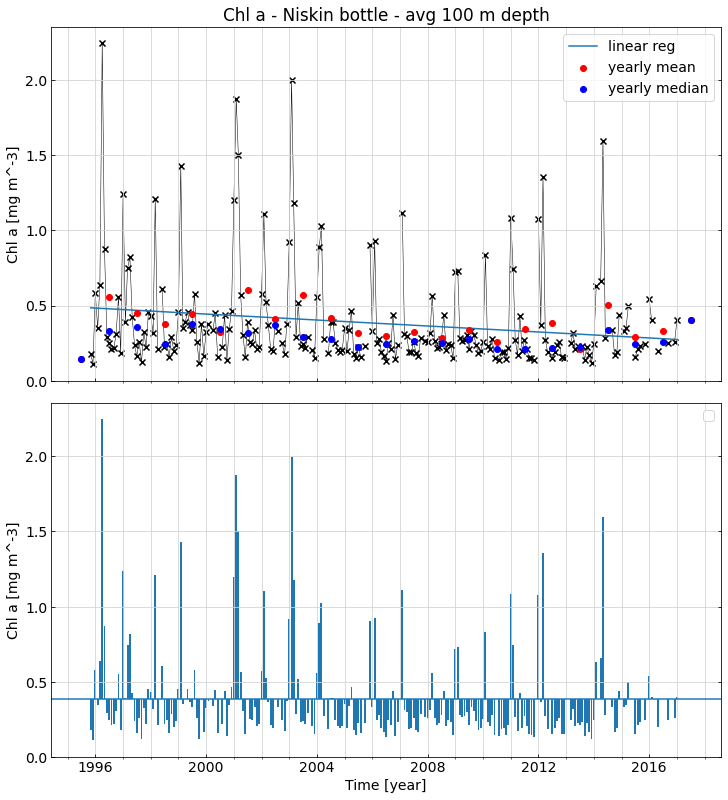

In [228]:
# combined plot:
var_data = pd.DataFrame(CARIACO, columns=['date', 'Chlorophyll'])
var_data = var_data.set_index('date')

import matplotlib.dates as mdates

from datetime import timedelta
delta = timedelta(days=365/2)

plt.rcParams['figure.figsize'] = [10, 11]
plt.rcParams.update({'font.size': 14})

f1, axes = plt.subplots(2, 1, sharex='col', constrained_layout=True) 

for ax in axes:
    ax.xaxis.set_minor_locator(mdates.YearLocator())
    
    ax.grid(True,which='both', color='lightgrey')
    ax.tick_params(top=False, right=True, direction="in")


#plot time series
axes[0].plot(var_data.index, var_data.iloc[:,-1:], c='black', lw=0.5, zorder=0)

axes[0].scatter(var_data.index, var_data.iloc[:,-1:], c='black', marker='x', zorder=0)


# plot yearly mean
yearly_mean = var_data.groupby(var_data.index.year).mean()
axes[0].scatter(var_data.resample('Y').first().index-delta, yearly_mean.iloc[:,-1:], c='red', label='yearly mean', zorder=10)
# plot yearly median
yearly_mean = var_data.groupby(var_data.index.year).median()
axes[0].scatter(var_data.resample('Y').first().index-delta, yearly_mean.iloc[:,-1:], c='blue', label='yearly median', zorder=10)

# plot linear reg
idx = np.isfinite(var_data.Chlorophyll.values)
fit = np.polyfit(mdates.date2num(var_data.index[idx]), var_data.iloc[:,-1:].values[idx].flatten(), 1)
fit_fn = np.poly1d(fit)

axes[0].plot(var_data.index, fit_fn(mdates.date2num(var_data.index)), label='linear reg', zorder=5)

axes[0].legend()
axes[0].set_ylim(bottom=0)

axes[0].set_ylabel("Chl a [mg m^-3]")
axes[1].set_ylabel("Chl a [mg m^-3]")
axes[1].set_xlabel("Time [year]")

plt.legend()
axes[0].set_title("Chl a - Niskin bottle - avg 100 m depth")


# plot 2

dat_mean = np.nanmean(var_data.Chlorophyll.values)

#plot time series
axes[1].bar(x=var_data.index, height=var_data.Chlorophyll.values-dat_mean, align='center',width=25,bottom=dat_mean)

#ax.spines['bottom'].set_position(('data', dat_mean))

#ax.scatter(var_data.index, var_data.iloc[:,-1:]- dat_mean, c='black', marker='x')
axes[1].axhline(y=dat_mean)


axes[1].set_ylim(bottom=0)
plt.savefig('Plots/02_ChlorophyllTimeSeries.pdf', bbox_inches='tight')
plt.show()

# PLOT Species Richness over time

No handles with labels found to put in legend.


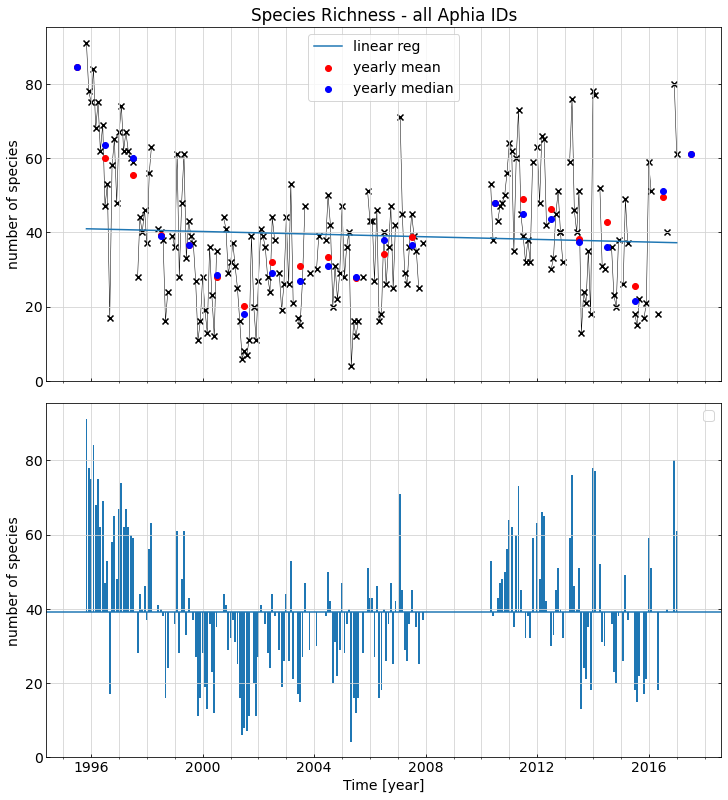

In [232]:
# combined plot:
var_data = pd.DataFrame(CARIACO, columns=['date', 'species_richness'])
var_data = var_data.set_index('date')

import matplotlib.dates as mdates

from datetime import timedelta
delta = timedelta(days=365/2)

plt.rcParams['figure.figsize'] = [10, 11]
plt.rcParams.update({'font.size': 14})

f1, axes = plt.subplots(2, 1, sharex='col', constrained_layout=True) 

for ax in axes:
    ax.xaxis.set_minor_locator(mdates.YearLocator())
    
    ax.grid(True,which='both', color='lightgrey')
    ax.tick_params(top=False, right=True, direction="in")


#plot time series
axes[0].plot(var_data.index, var_data.iloc[:,-1:], c='black', lw=0.5, zorder=0)

axes[0].scatter(var_data.index, var_data.iloc[:,-1:], c='black', marker='x', zorder=0)


# plot yearly mean
yearly_mean = var_data.groupby(var_data.index.year).mean()
axes[0].scatter(var_data.resample('Y').first().index-delta, yearly_mean.iloc[:,-1:], c='red', label='yearly mean', zorder=10)
# plot yearly median
yearly_mean = var_data.groupby(var_data.index.year).median()
axes[0].scatter(var_data.resample('Y').first().index-delta, yearly_mean.iloc[:,-1:], c='blue', label='yearly median', zorder=10)

# plot linear reg
idx = np.isfinite(var_data.species_richness.values)
fit = np.polyfit(mdates.date2num(var_data.index[idx]), var_data.iloc[:,-1:].values[idx].flatten(), 1)
fit_fn = np.poly1d(fit)

axes[0].plot(var_data.index, fit_fn(mdates.date2num(var_data.index)), label='linear reg', zorder=5)

axes[0].legend()
axes[0].set_ylim(bottom=0)

axes[0].set_ylabel("number of species")
axes[1].set_ylabel("number of species")
axes[1].set_xlabel("Time [year]")

plt.legend()
axes[0].set_title("Species Richness - all Aphia IDs")


# plot 2

dat_mean = np.nanmean(var_data.values)

#plot time series
axes[1].bar(x=var_data.index, height=var_data.species_richness.values-dat_mean, align='center',width=25,bottom=dat_mean)

#ax.spines['bottom'].set_position(('data', dat_mean))

#ax.scatter(var_data.index, var_data.iloc[:,-1:]- dat_mean, c='black', marker='x')
axes[1].axhline(y=dat_mean)


axes[1].set_ylim(bottom=0)
plt.savefig('Plots/03_SpeciesRichness.pdf', bbox_inches='tight')
plt.show()

In [ ]:
# plot 

No handles with labels found to put in legend.


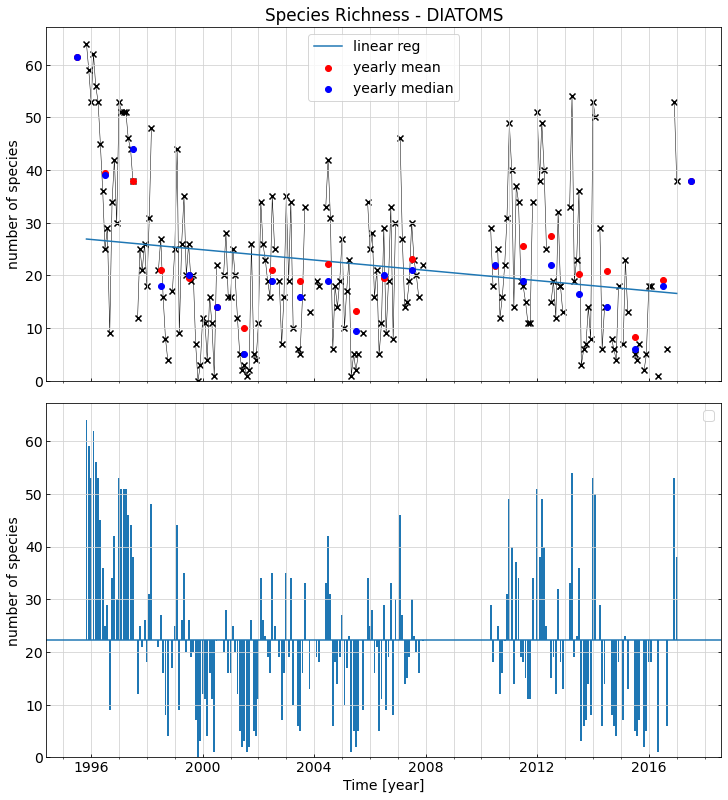

In [233]:
# combined plot:
var_data = pd.DataFrame(CARIACO, columns=['date', 'SR_DIATOMS'])
var_data = var_data.set_index('date')

import matplotlib.dates as mdates

from datetime import timedelta
delta = timedelta(days=365/2)

plt.rcParams['figure.figsize'] = [10, 11]
plt.rcParams.update({'font.size': 14})

f1, axes = plt.subplots(2, 1, sharex='col', constrained_layout=True) 

for ax in axes:
    ax.xaxis.set_minor_locator(mdates.YearLocator())
    
    ax.grid(True,which='both', color='lightgrey')
    ax.tick_params(top=False, right=True, direction="in")


#plot time series
axes[0].plot(var_data.index, var_data.iloc[:,-1:], c='black', lw=0.5, zorder=0)

axes[0].scatter(var_data.index, var_data.iloc[:,-1:], c='black', marker='x', zorder=0)


# plot yearly mean
yearly_mean = var_data.groupby(var_data.index.year).mean()
axes[0].scatter(var_data.resample('Y').first().index-delta, yearly_mean.iloc[:,-1:], c='red', label='yearly mean', zorder=10)
# plot yearly median
yearly_mean = var_data.groupby(var_data.index.year).median()
axes[0].scatter(var_data.resample('Y').first().index-delta, yearly_mean.iloc[:,-1:], c='blue', label='yearly median', zorder=10)

# plot linear reg
idx = np.isfinite(var_data.SR_DIATOMS.values)
fit = np.polyfit(mdates.date2num(var_data.index[idx]), var_data.iloc[:,-1:].values[idx].flatten(), 1)
fit_fn = np.poly1d(fit)

axes[0].plot(var_data.index, fit_fn(mdates.date2num(var_data.index)), label='linear reg', zorder=5)

axes[0].legend()
axes[0].set_ylim(bottom=0)

axes[0].set_ylabel("number of species")
axes[1].set_ylabel("number of species")
axes[1].set_xlabel("Time [year]")

plt.legend()
axes[0].set_title("Species Richness - DIATOMS")


# plot 2

dat_mean = np.nanmean(var_data.values)

#plot time series
axes[1].bar(x=var_data.index, height=var_data.SR_DIATOMS.values-dat_mean, align='center',width=25,bottom=dat_mean)

#ax.spines['bottom'].set_position(('data', dat_mean))

#ax.scatter(var_data.index, var_data.iloc[:,-1:]- dat_mean, c='black', marker='x')
axes[1].axhline(y=dat_mean)


axes[1].set_ylim(bottom=0)
plt.savefig('Plots/04_SpeciesRichnessDIATOMS.pdf', bbox_inches='tight')
plt.show()

In [ ]:
MLD_potemp

In [276]:
def plot_TS(var, units, invert_y=False):
    # combined plot:
    var_data = pd.DataFrame(CARIACO, columns=['date', var])
    var_data = var_data.set_index('date')

    import matplotlib.dates as mdates

    from datetime import timedelta
    delta = timedelta(days=365/2)

    plt.rcParams['figure.figsize'] = [10, 11]
    plt.rcParams.update({'font.size': 14})

    f1, axes = plt.subplots(2, 1, sharex='col', constrained_layout=True) 

    for ax in axes:
        ax.xaxis.set_minor_locator(mdates.YearLocator())

        ax.grid(True,which='both', color='lightgrey')
        ax.tick_params(top=False, right=True, direction="in")


    #plot time series
    axes[0].plot(var_data.index, var_data.iloc[:,-1:], c='black', lw=0.5, zorder=0)

    axes[0].scatter(var_data.index, var_data.iloc[:,-1:], c='black', marker='x', zorder=0)


    # plot yearly mean
    yearly_mean = var_data.groupby(var_data.index.year).mean()
    axes[0].scatter(var_data.resample('Y').first().index-delta, yearly_mean.iloc[:,-1:], c='red', label='yearly mean', zorder=10)
    # plot yearly median
    yearly_mean = var_data.groupby(var_data.index.year).median()
    axes[0].scatter(var_data.resample('Y').first().index-delta, yearly_mean.iloc[:,-1:], c='blue', label='yearly median', zorder=10)

    # plot linear reg
    idx = np.isfinite(var_data[var].values)
    fit = np.polyfit(mdates.date2num(var_data.index[idx]), var_data.iloc[:,-1:].values[idx].flatten(), 1)
    fit_fn = np.poly1d(fit)

    axes[0].plot(var_data.index, fit_fn(mdates.date2num(var_data.index)), label='linear reg', zorder=5)

    axes[0].legend()
    #axes[0].set_ylim(bottom=0)

    axes[0].set_ylabel(units)
    axes[1].set_ylabel(units)
    axes[1].set_xlabel("Time [year]")

    plt.legend()
    axes[0].set_title("time series - " + var)


    # plot 2

    dat_mean = np.nanmean(var_data.values)

    #plot time series
    axes[1].bar(x=var_data.index, height=var_data[var].values-dat_mean, align='center',width=25,bottom=dat_mean)

    #ax.spines['bottom'].set_position(('data', dat_mean))

    #ax.scatter(var_data.index, var_data.iloc[:,-1:]- dat_mean, c='black', marker='x')
    axes[1].axhline(y=dat_mean)


    #axes[1].set_ylim(bottom=0)
    

    #plt.savefig('Plots/04_SpeciesRichnessDIATOMS.pdf', bbox_inches='tight')
    if invert_y == True:
        axes[0].invert_yaxis()
        axes[1].invert_yaxis()
    
    # plt.savefig('Plots/09_total_zoo_biomass.pdf', bbox_inches='tight')
        
    plt.show()

No handles with labels found to put in legend.


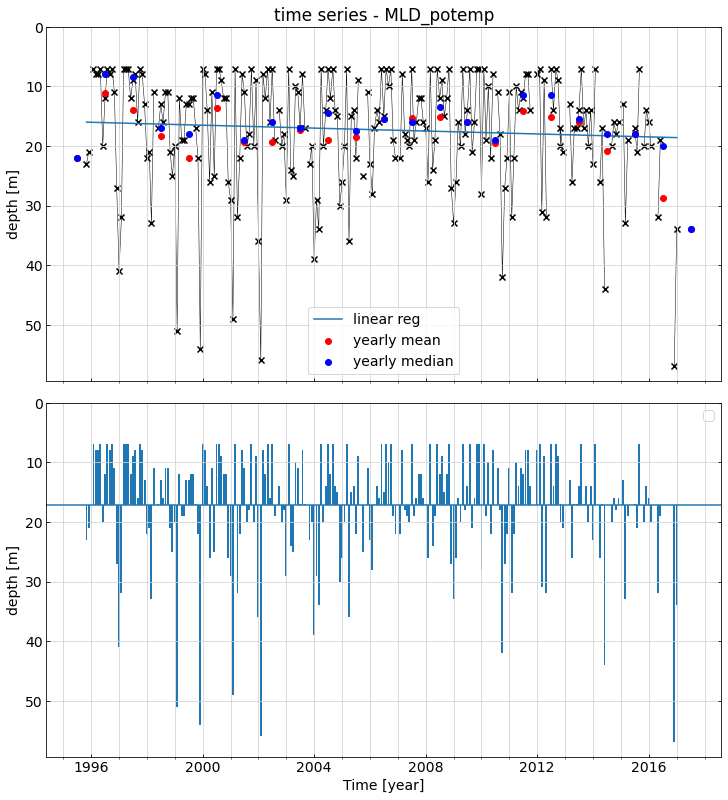

In [254]:
plot_TS('MLD_potemp', "depth [m]", invert_y=True)

No handles with labels found to put in legend.


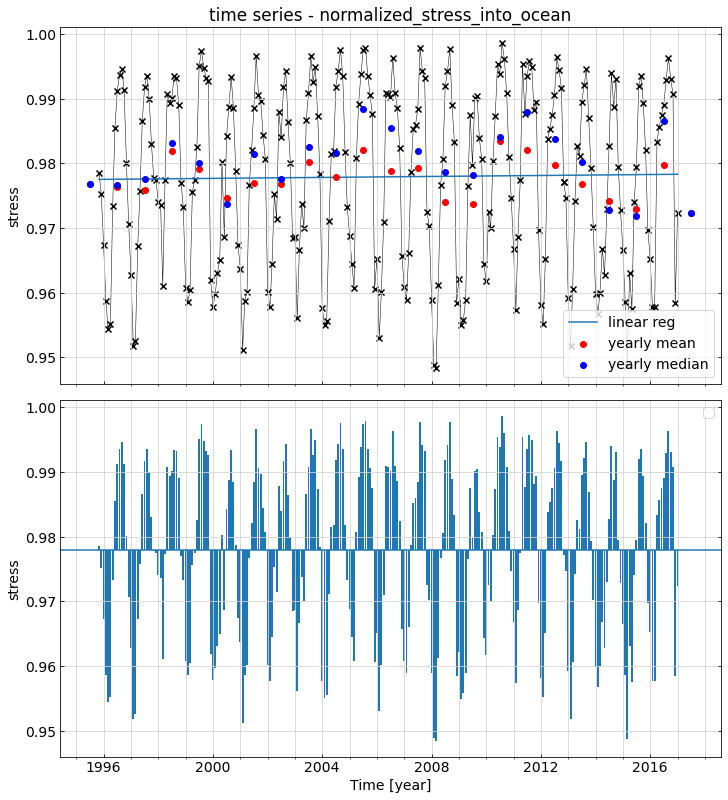

In [259]:
plot_TS('normalized_stress_into_ocean', "stress")

No handles with labels found to put in legend.


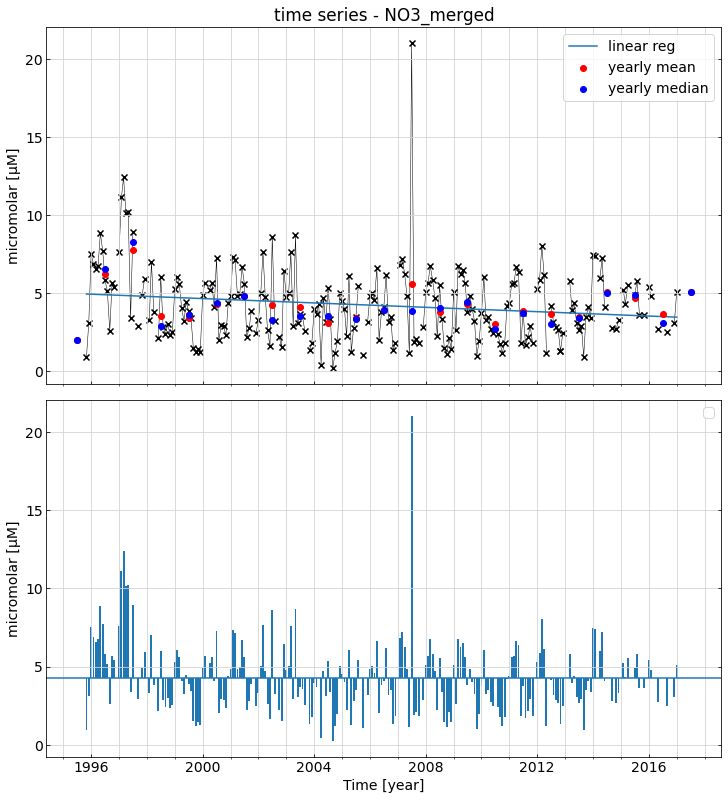

In [265]:
plot_TS('NO3_merged', "micromolar [µM]")

No handles with labels found to put in legend.


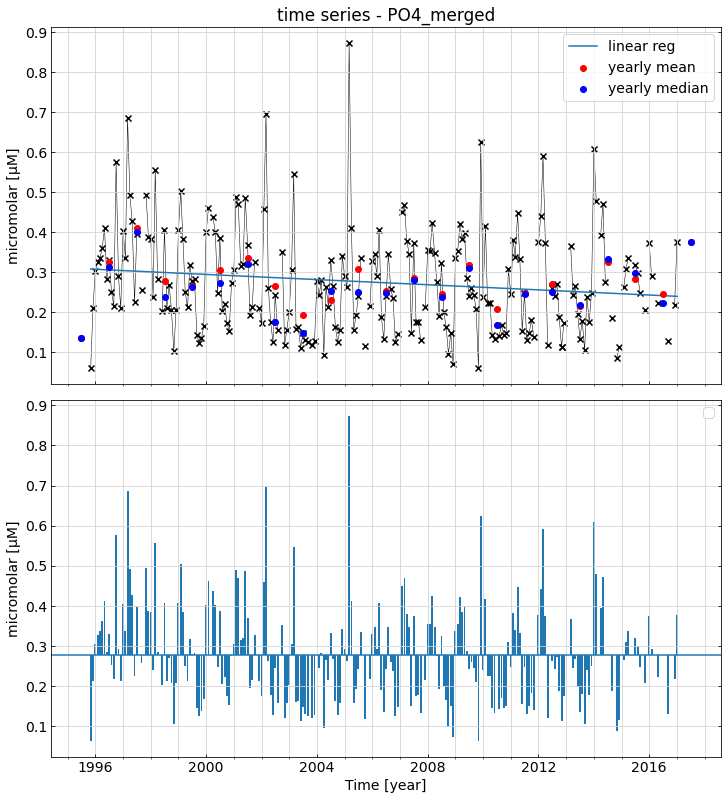

In [269]:
plot_TS('PO4_merged', "micromolar [µM]")

No handles with labels found to put in legend.


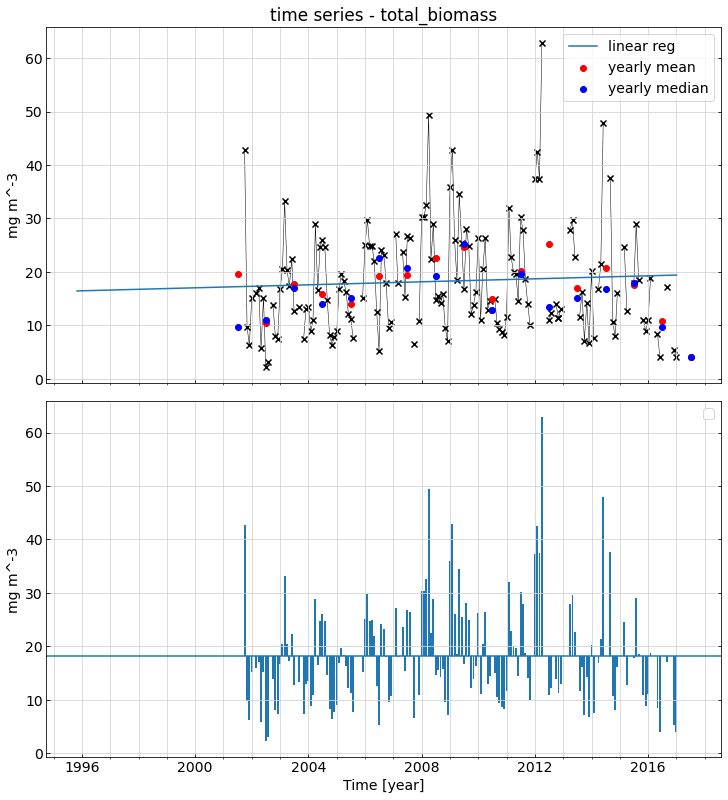

In [275]:
plot_TS('total_biomass', "mg m^-3")

In [ ]:
from datetime import timedelta
delta = timedelta(days=365/2)

import matplotlib.dates as mdates



def plt_envvar_timeseries(var_data):
    
    # plot yearly mean
    yearly_mean = var_data.groupby(var_data.index.year).mean()
    plt.scatter(var_data.resample('Y').first().index-delta, yearly_mean.iloc[:,-1:], c='red', label='yearly mean')
    # plot yearly median
    yearly_mean = var_data.groupby(var_data.index.year).median()
    plt.scatter(var_data.resample('Y').first().index-delta, yearly_mean.iloc[:,-1:], c='blue', label='yearly median')

    # plot linear reg
    fit = np.polyfit(mdates.date2num(var_data.index), var_data.iloc[:,-1:].values.flatten(), 1)
    fit_fn = np.poly1d(fit)
    
    plt.plot(var_data.index, fit_fn(mdates.date2num(var_data.index)), label='linear reg')
    
    #plot time series
    plt.plot(var_data.index, var_data.iloc[:,-1:], c='black')
    
    plt.title(var_data.name + ' - timeseries', fontsize=30)
    
    plt.legend()
    #plt.colorbar()
    if np.mean(var_data.iloc[:,-1:]).values > 100:
        pass
    elif np.mean(var_data.iloc[:,-1:]).values > 0:
        plt.ylim(bottom=0)
    else:
        plt.ylim(top=0)
    plt.show()